In [2]:
# Libraries
from __future__ import division
import numpy as np
import random
import math

In [3]:
# Helper Functions
#
#
# Function: golden_search
#
# Required Parameters:
# 1. x, a list containing a scalar in each dimension, x1, x2, ... , xN 
# 2. d, a list containing a direction in each dimension, d1, d2, ... , dN
#
# Optional Parameters:
# 1. low, a point to lower bound the initial golden search
# 2. high, a point to upper bound the initial golden search
# 3. alpha, the golden ratio number
# 4. verbose, to echo each steps progress
def golden_search(x, d, low=0, high=1, eps=0.1, alpha = 0.618, verbose=False):


    #  math.sin(x)*math.cos(y)+ y/z + x/z
    flambda = lambda l: math.sin((x[0]-l*d[0]))*math.cos((x[1]-l*d[1])) + (x[0]-l*d[0])/(x[2]-l*d[2]) + (x[1]-l*d[1])/(x[2]-l*d[2])
    
    
    if verbose:
        print("*******************************")
        print("Executing Golden Ratio Search")
        print("*******************************")

    # Define Constants
    k=0
    
    # Create lists
    lam=list()
    mu=list()
    a=list()
    b=list()
    distances=list()
    
    # Step 1
    a.append(low)
    b.append(high)

    lam0 = a[k] + (1-alpha)*(b[k]-a[k])
    mu0 = a[k] + alpha*(b[k]-a[k])
    
    lam.append(lam0)
    mu.append(mu0)
    
    if verbose:
        print("************************")
        print(("[a,b]"), "|b[k]-a[k]|")
        print("************************")
        
    while True:
        distances.append(abs(b[k]-a[k])) 
        if verbose:
            print(a[k],b[k], distances[k])

        if(distances[k] < eps): # optimal soln lies within [a,b]
            break
        elif flambda(lam[k]) > flambda(mu[k]):
            # Step 2
            a.append(lam[k])
            b.append(b[k])
            lam.append(mu[k])
            mu.append(a[k+1] + alpha*(b[k+1]-a[k+1]))
        elif flambda(lam[k]) <= flambda(mu[k]):
            # Step3
            a.append(a[k])
            b.append(mu[k])
            mu.append(lam[k])
            lam.append(a[k+1]+(1-alpha)*(b[k+1]-a[k+1]))
        else:
            print("Something went wrong.")

        k += 1
    
    #return random.uniform(a[-1], b[-1])
    return (a[-1]+b[-1])/2


In [4]:
# Conjugate Gradient Method of Fletcher and Reeves p. 423
# min w = math.sin(x**2*math.sin(x) + y**2*math.sin(y)) + x*y*z
# 4d Periodic Valley Function, with multiple local minima depending on x0
f = lambda x,y,z: math.sin(x)*math.cos(y)+ y/z + x/z  

fgradient = lambda x,y,z: np.array([math.cos(x)*math.cos(y)+1/z,
                                    -math.sin(y)*math.sin(x)+1/z,
                                    -y/z**2 + -x/z**2])

get_alpha = lambda ynext, ynow: (np.linalg.norm(ynext)**2) / (np.linalg.norm(ynow)**2)

def printer(index):
    print("X:",xList[index], "D:",dList[index], "Z:",zList[index], "l:",lList[index], "a:",aList[index])
    
    
    
results = [] # starting point, final soln

for i in range(10):
    # Initialization Step
    xList=[]
    dList=[]
    zList=[]
    aList=[]
    lList=[]
    eps=0.01


    #x1=random.uniform(0,2*math.pi)
    #x2=random.uniform(0,2*math.pi)
    #x3=random.uniform(0,2*math.pi)
    x1=random.randint(-1000, 1000)
    x2=random.randint(-1000, 1000)
    x3=random.randint(-1000, 1000)
    
    d1=fgradient(x1,x2,x3)[0]
    d2=fgradient(x1,x2,x3)[1]
    d3=fgradient(x1,x2,x3)[2]
    z=f(x1,x2,x3)

    xList.append((x1,x2,x3))
    dList.append((d1,d2,d3))
    zList.append(z)
    aList.append("nil")
    lList.append("nil")

    
    j=0
    while np.linalg.norm(fgradient(x1,x2,x3)) >= eps:

        printer(-1)

        lambd= golden_search(xList[-1], dList[-1],verbose=False)
        lList.append(lambd)

        x1=xList[-1][0]-lambd*dList[-1][0]
        x2=xList[-1][1]-lambd*dList[-1][1]
        x3=xList[-1][2]-lambd*dList[-1][2]

        xList.append((x1,x2,x3))
        z=f(x1,x2,x3)
        zList.append(f(x1,x2,x3))

        alpha = get_alpha(fgradient(xList[-1][0],xList[-1][1],xList[-1][2]),  #new x,y,z
                          fgradient(xList[-2][0],xList[-2][1],xList[-2][2]))  #old x,y,z
        aList.append(alpha)

        d1=fgradient(xList[-1][0],xList[-1][1], xList[-1][2])[0] + alpha*dList[-1][0]
        d2=fgradient(xList[-1][0],xList[-1][1], xList[-1][2])[1] + alpha*dList[-1][1]
        d3=fgradient(xList[-1][0],xList[-1][1], xList[-1][2])[2] + alpha*dList[-1][2]
        dList.append((d1,d2,d3))
        j+=1
        if j > 1000:
            break
            
        #if np.linalg.norm(np.array(xList[-1])-np.array(xList[-2])) < eps:
        #    print("~~~~~ BREAK")
        #    break
    print("*** Final Solution ***")
    print("Iteration Count: ", str(j))
    printer(-1)
    results.append((xList[0],tuple(map(lambda x:np.round(x,decimals=5),xList[-1])),j, zList[-1]))


('X:', (532, -799, -673), 'D:', (-0.2460326861625205, -0.75631343233957404, 0.00058949636698025533), 'Z:', -0.05095697551631695, 'l:', 'nil', 'a:', 'nil')
('X:', (532.23493894539058, -798.27778913058239, -673.00056291567159), 'D:', (-0.30984978668993746, -0.48082380506113082, 0.00072919174177731808), 'Z:', -0.52281432318315957, 'l:', 0.954909484, 'a:', 0.24056060403293036)
('X:', (532.45766934707353, -797.93215687960014, -673.00108708311188), 'D:', (-0.049571239495930342, 0.02180242671898543, 0.00059985753174047508), 'Z:', -0.60411879597934115, 'l:', 0.718833484, 'a:', 0.018830662190235988)
('X:', (532.50500539380187, -797.95297622364831, -673.00165989275797), 'D:', (0.0015837906496045193, 0.010942602053260145, 0.00061003366861159421), 'Z:', -0.60549650935760735, 'l:', 0.954909484, 'a:', 0.039954224718406949)
*** Final Solution ***
('Iteration Count: ', '4')
('X:', (532.50349301708991, -797.96342541812862, -673.00224241969374), 'D:', (0.0021173378047301193, 7.1751148658971903e-05, 0.00

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
D=pd.DataFrame(results, columns=["X[0]", "X[N]" ,"Iteration Count", "Z"])
D.index.name="Sample #"
D

,X[0],X[N],Iteration Count,Z
Sample #,,,,
0,"(747, 709, -805)","(746.12768, 710.00608, -804.99326)",3,-2.808858
1,"(433, 531, 772)","(435.11311, 530.92234, 772.00698)",4,0.251356
2,"(-972, 293, -78)","(-972.32221, 292.17307, -268.85792)",194,1.529784
3,"(11, 276, 616)","(10.99399, 276.45753, 616.00141)",2,-0.533354
4,"(-163, 457, 270)","(-161.77845, 455.51013, 270.1524)",36,0.087590
5,"(-398, 653, -98)","(-397.41474, 653.4446, 163.79131)",142,0.563174
6,"(529, 550, 788)","(529.35703, 549.77809, 788.00324)",2,0.369456
7,"(-346, 277, -12)","(-347.13231, 276.47567, -91.7456)",128,-0.229650
8,"(588, 257, 270)","(589.04369, 257.60258, 314.48008)",105,1.692254


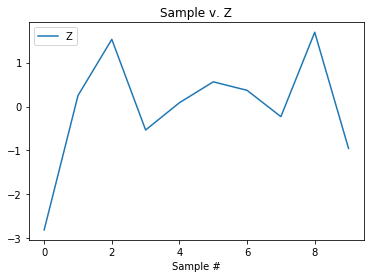

In [69]:
D[["X[N]","Z"]].plot(title="Sample v. Z")
plt.show()

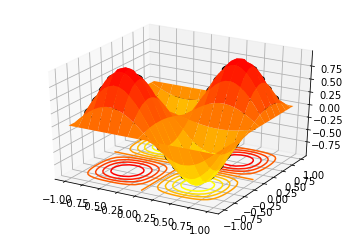

In [84]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
X, Y = np.mgrid[-1:1:30j, -1:1:30j]
Z = np.sin(np.pi*X)*np.sin(np.pi*Y)
ax.plot_surface(X, Y, Z, cmap="autumn_r", lw=0.5, rstride=2, cstride=2)
ax.contour(X, Y, Z, 10, lw=3, cmap="autumn_r", linestyles="solid", offset=-1)
ax.contour(X, Y, Z, 10, lw=3, colors="k", linestyles="solid")
plt.show()